# 



In [22]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import LineString
import rasterio as rio
import pandas as pd
import matplotlib as mpl

In [8]:
import sys
sys.path.append('/Users/home/whitefar/DATA/code/REMOTE_SENSING/ICESAT/')
from cross_channel import icesat_dataset

In [9]:
ds = icesat_dataset("/Volumes/arc_02/REMOTE_SENSING/ICESAT2/ATLAS/ATLXI/ds_subset_kamb_20201111.nc")

For this dataset
cycle number, corresponding number of points
9    2356
8    2356
7    2356
6    2356
5    2356
4    2356
3    2356
Name: cycle_number, dtype: int64
cycle number, corresponding number of non NaN points
3    2334
8    2071
7    1568
5    1281
6    1267
4    1261
9     251
Name: cycle_number, dtype: int64


In [10]:
ds.gda['dates'] = [ts.date() for ts in ds.gda.utc_time]
ds.gda.dates.unique()

array([datetime.date(2019, 4, 5), datetime.date(2019, 4, 9),
       datetime.date(2019, 4, 21), datetime.date(2019, 4, 25),
       datetime.date(2019, 5, 8), datetime.date(2019, 5, 24),
       datetime.date(2019, 6, 6), NaT, datetime.date(2019, 6, 22),
       datetime.date(2019, 6, 26), datetime.date(2019, 8, 7),
       datetime.date(2019, 8, 22), datetime.date(2019, 9, 9),
       datetime.date(2019, 9, 20), datetime.date(2019, 9, 24),
       datetime.date(2019, 10, 4), datetime.date(2019, 10, 8),
       datetime.date(2019, 10, 19), datetime.date(2019, 10, 23),
       datetime.date(2019, 11, 6), datetime.date(2019, 12, 20),
       datetime.date(2020, 1, 3), datetime.date(2020, 1, 18),
       datetime.date(2020, 1, 22), datetime.date(2020, 2, 5),
       datetime.date(2020, 2, 20), datetime.date(2020, 3, 9),
       datetime.date(2020, 3, 20), datetime.date(2020, 3, 24),
       datetime.date(2020, 4, 3), datetime.date(2020, 4, 7),
       datetime.date(2020, 4, 22), datetime.date(2020, 5, 

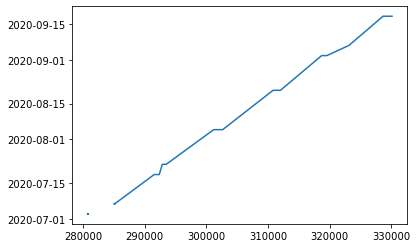

In [11]:
plt.plot(ds.gda[ds.gda.cycle_number==8].utc_time)

In [12]:
# ds.dadh.cycle_number.max()

In [13]:
print(dir(ds))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'channel_mid', 'gda', 'gda_lines', 'getdata_alllines', 'getdata_dhdt', 'getdata_line', 'is_lines', 'meta', 'plot_dhdt_crosssection', 'plot_dhdt_crosssection_map', 'plot_dhdt_map', 'plot_icesat_lines_map', 'plot_line_crosssection', 'plot_multiple_dhdt_crosssection', 'plot_multiple_dhdt_crosssection_map']


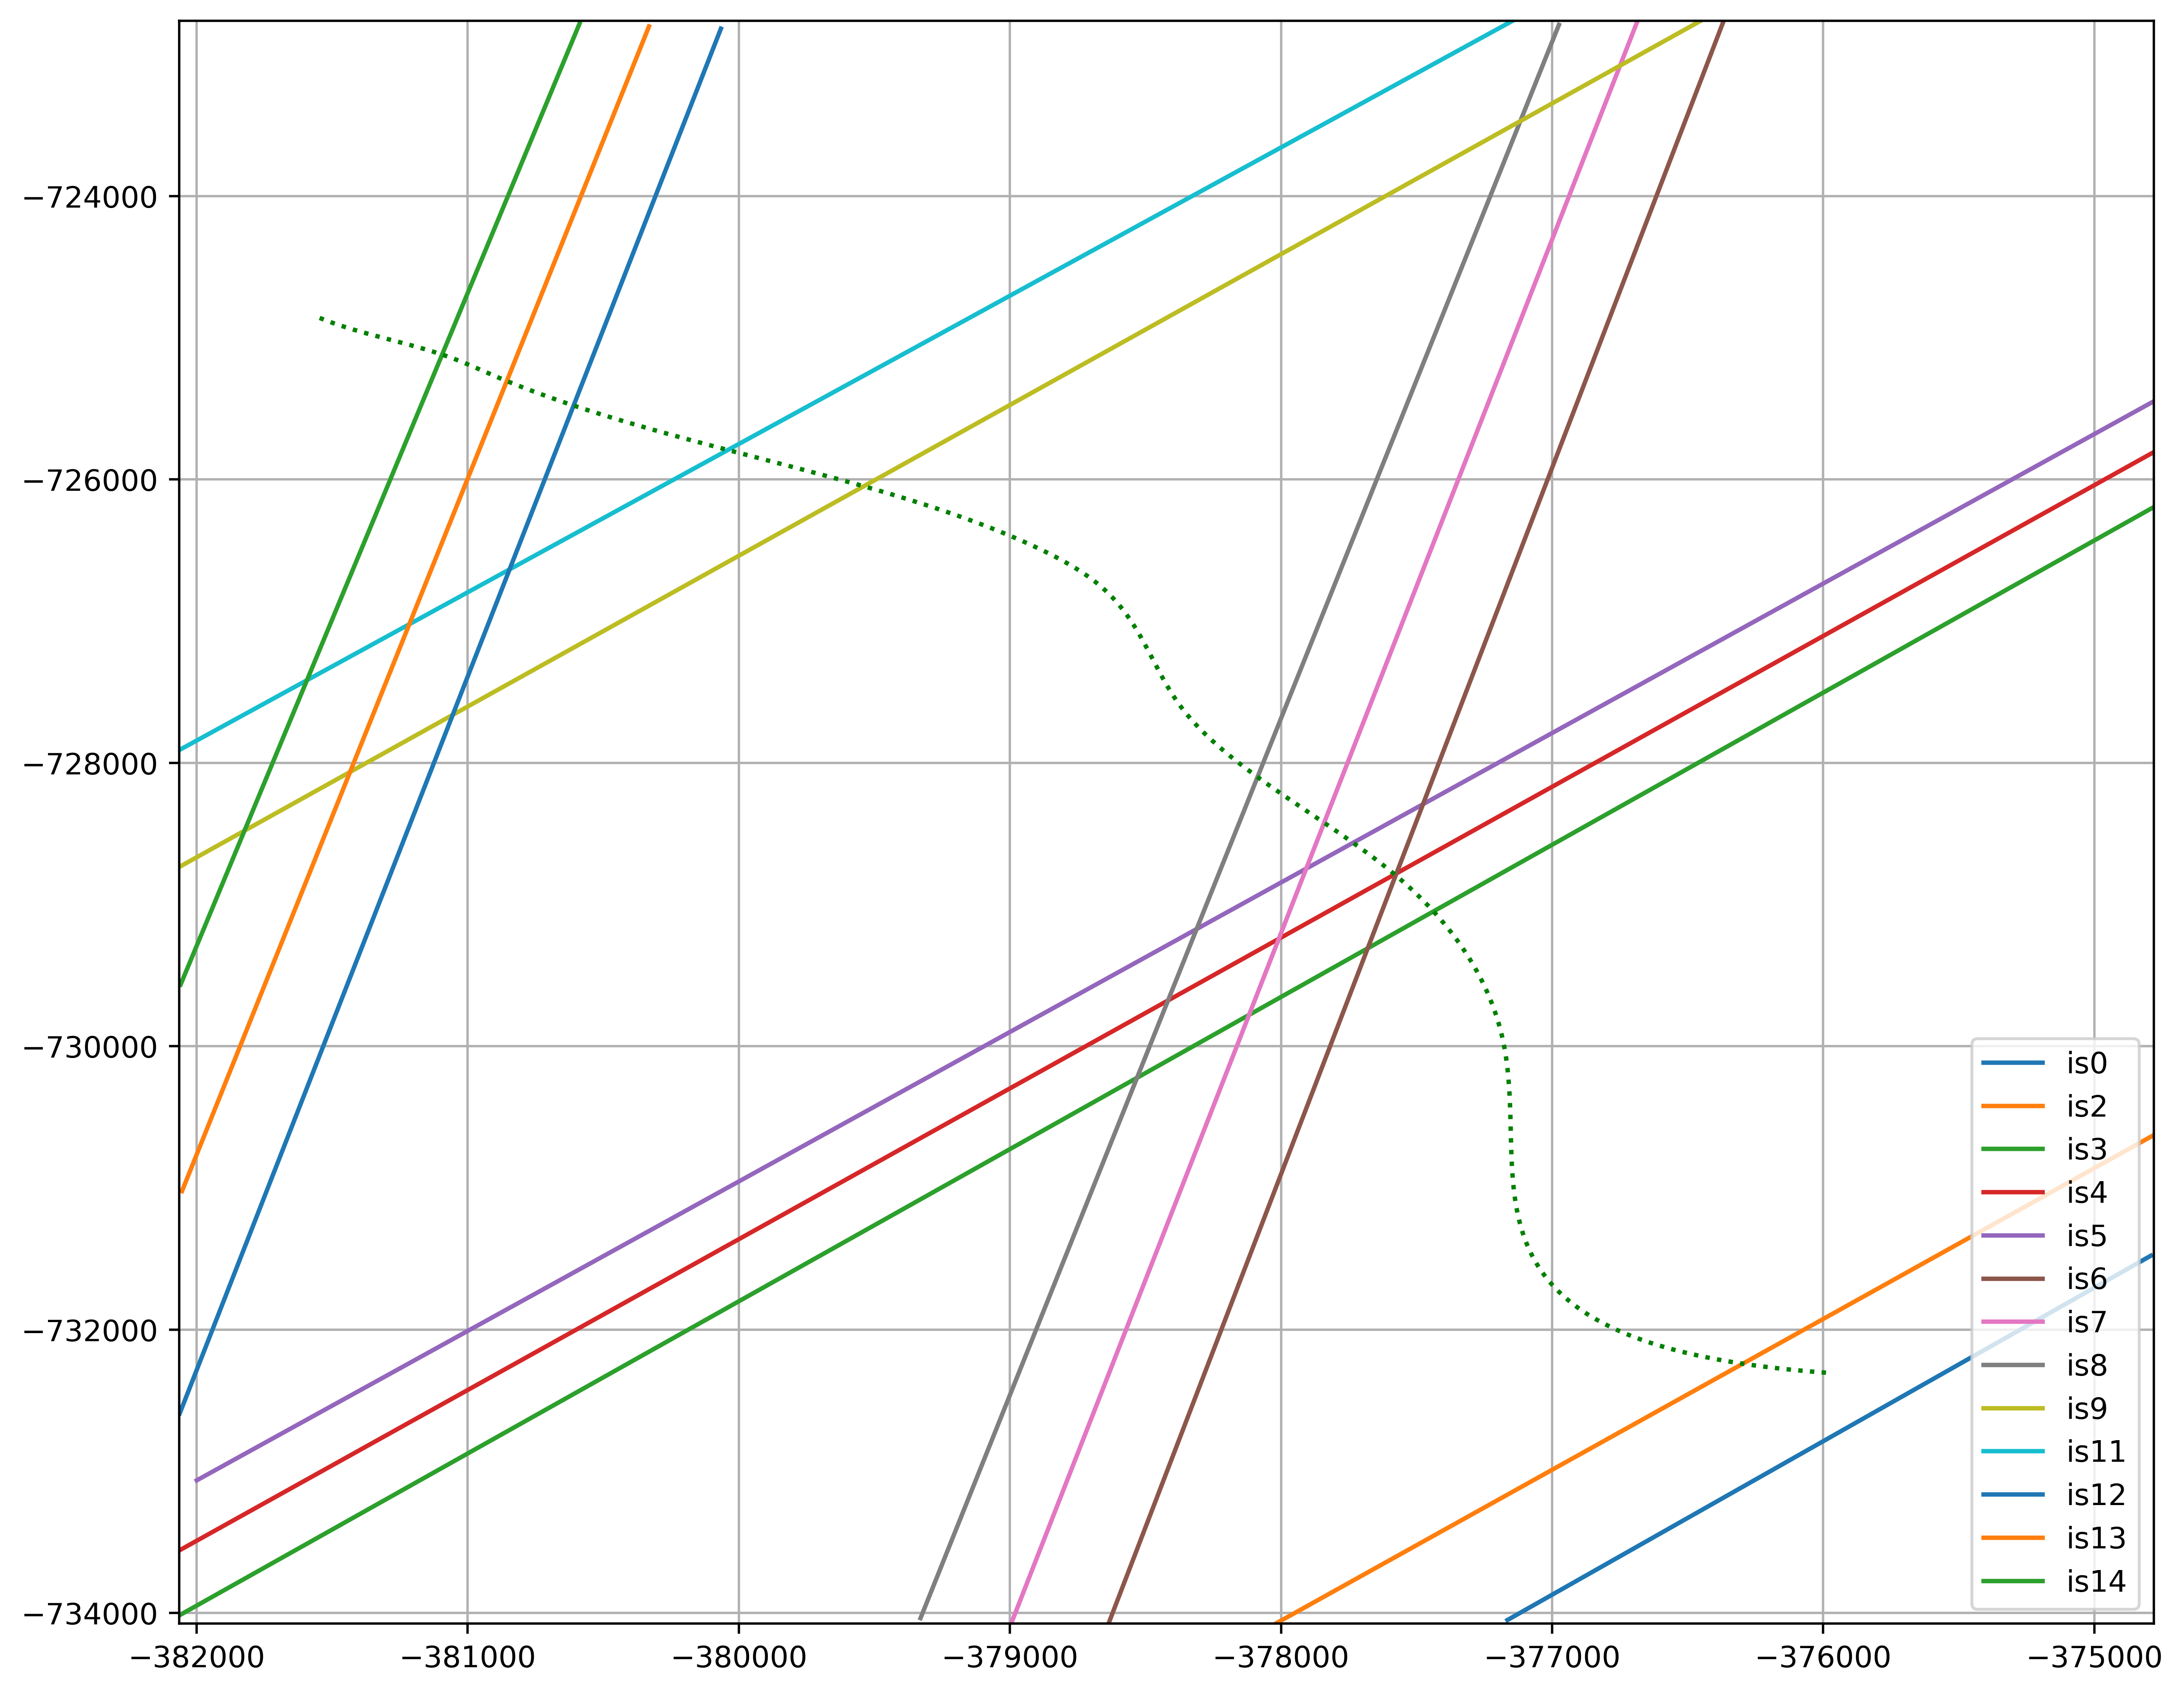

In [14]:
ds.plot_icesat_lines_map()


In [15]:
ds.getdata_alllines(buff=40)

icesat_line_number    0     2      3      4      5    6      7      8      9   \
cycle_number                                                                    
3                   67.0  84.0  192.0  192.0  189.0  8.0  209.0  212.0  154.0   
4                   64.0  84.0    3.0  186.0  183.0  6.0  206.0   11.0  146.0   
5                    3.0   3.0  187.0    3.0  183.0  5.0  204.0    8.0    8.0   
6                   61.0  81.0  170.0  183.0  180.0  8.0   11.0   14.0  142.0   
7                    6.0   3.0  189.0    6.0  186.0  5.0  114.0  206.0   45.0   
8                    3.0  84.0  189.0  189.0  186.0  8.0  209.0  212.0  154.0   
9                    NaN   NaN    NaN    NaN    NaN  NaN    NaN    NaN    2.0   

icesat_line_number     11     12     13     14  
cycle_number                                    
3                   131.0  179.0  153.0  128.0  
4                     3.0  176.0    5.0    6.0  
5                   128.0  177.0    5.0  119.0  
6                   125.0

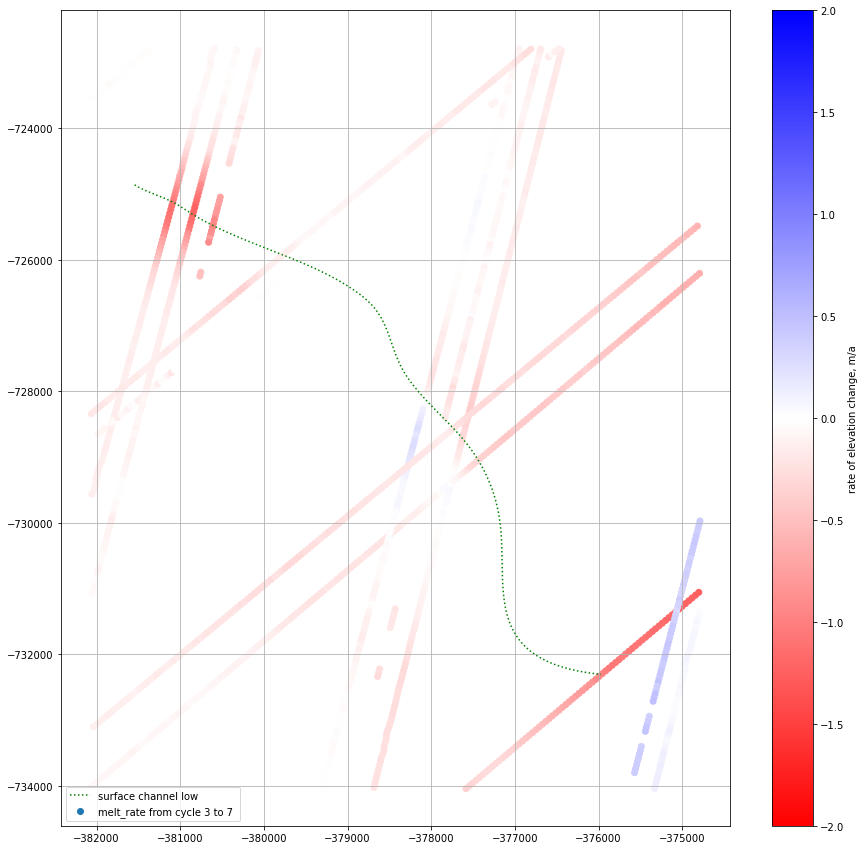

In [16]:
ds.plot_dhdt_map(cycle_number_from=3,cycle_number_till=7,vmin=-2,vmax=2)

In [17]:
ds.dadh['dates'] = [ts.date() for ts in ds.dadh.utc_time]
ds.dadh.dates.unique()

array([datetime.date(2019, 4, 5), datetime.date(2019, 4, 9),
       datetime.date(2019, 4, 21), datetime.date(2019, 4, 25),
       datetime.date(2019, 5, 8), datetime.date(2019, 5, 24),
       datetime.date(2019, 6, 6), NaT, datetime.date(2019, 6, 22),
       datetime.date(2019, 6, 26)], dtype=object)

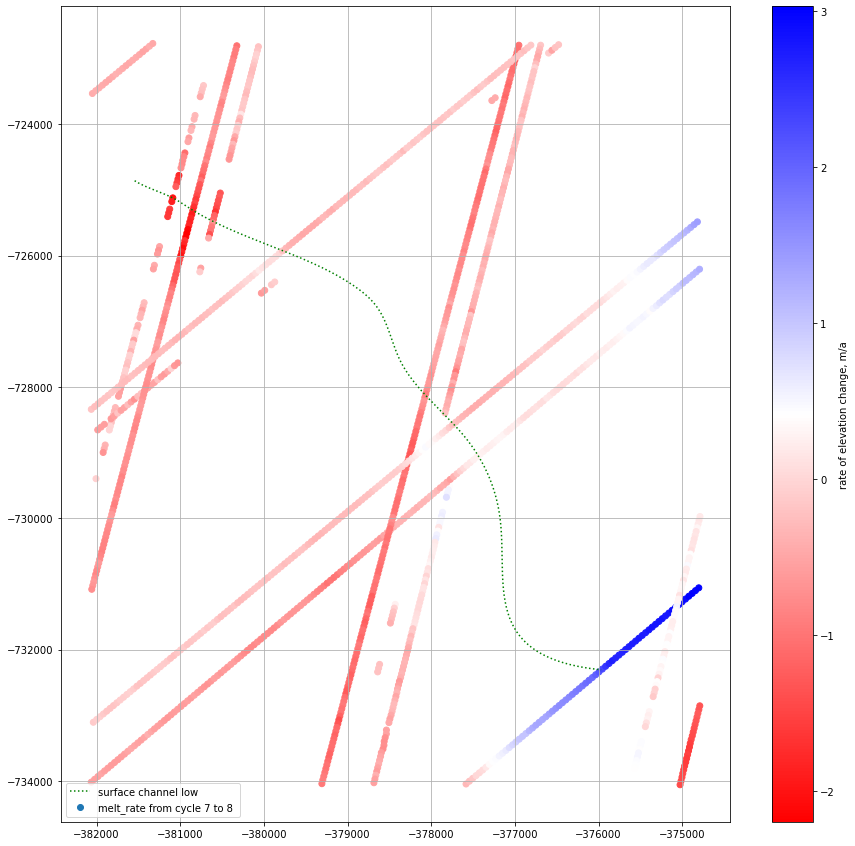

In [18]:
ds.plot_dhdt_map(cycle_number_from=7,cycle_number_till=8)

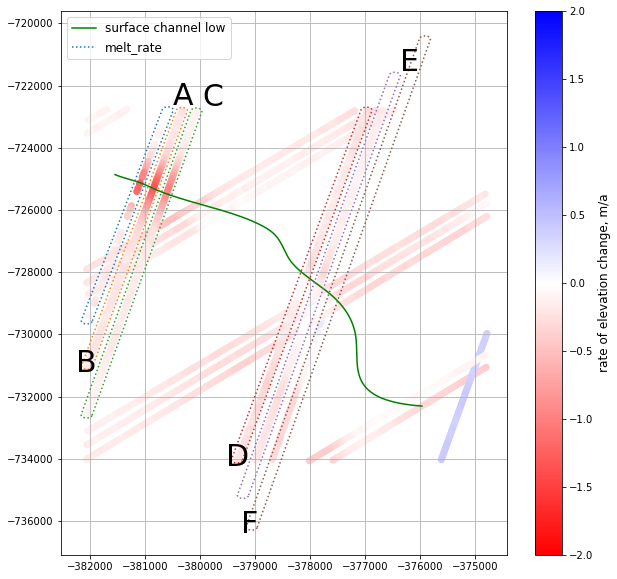

In [19]:
ds.plot_multiple_dhdt_crosssection_map(cycle_number_from=3,cycle_number_till=8,
                                       icesat_lines = [[14,'up'],[13,'down'],[12,'up'],[8,'down'],
                                                       [7,'up'],[6,'down']],
                                      buff=100,vmin=-2.0,vmax=2.0)

# icesat2_a
## modify this plot fit for the paper

In [26]:
letters_placement = [[-381.0, -724],
                     [-380.7, -724.1],
                     [-380.4, -724.2],
                     [-377.3, -724],
                     [-377, -724.1],
                     [-376.7, -724.2]
                    ]
yticks = (np.linspace(-734000,-722000,4)/1000).astype(int)
xticks = (np.linspace(-382000,-376000,4)/1000).astype(int)

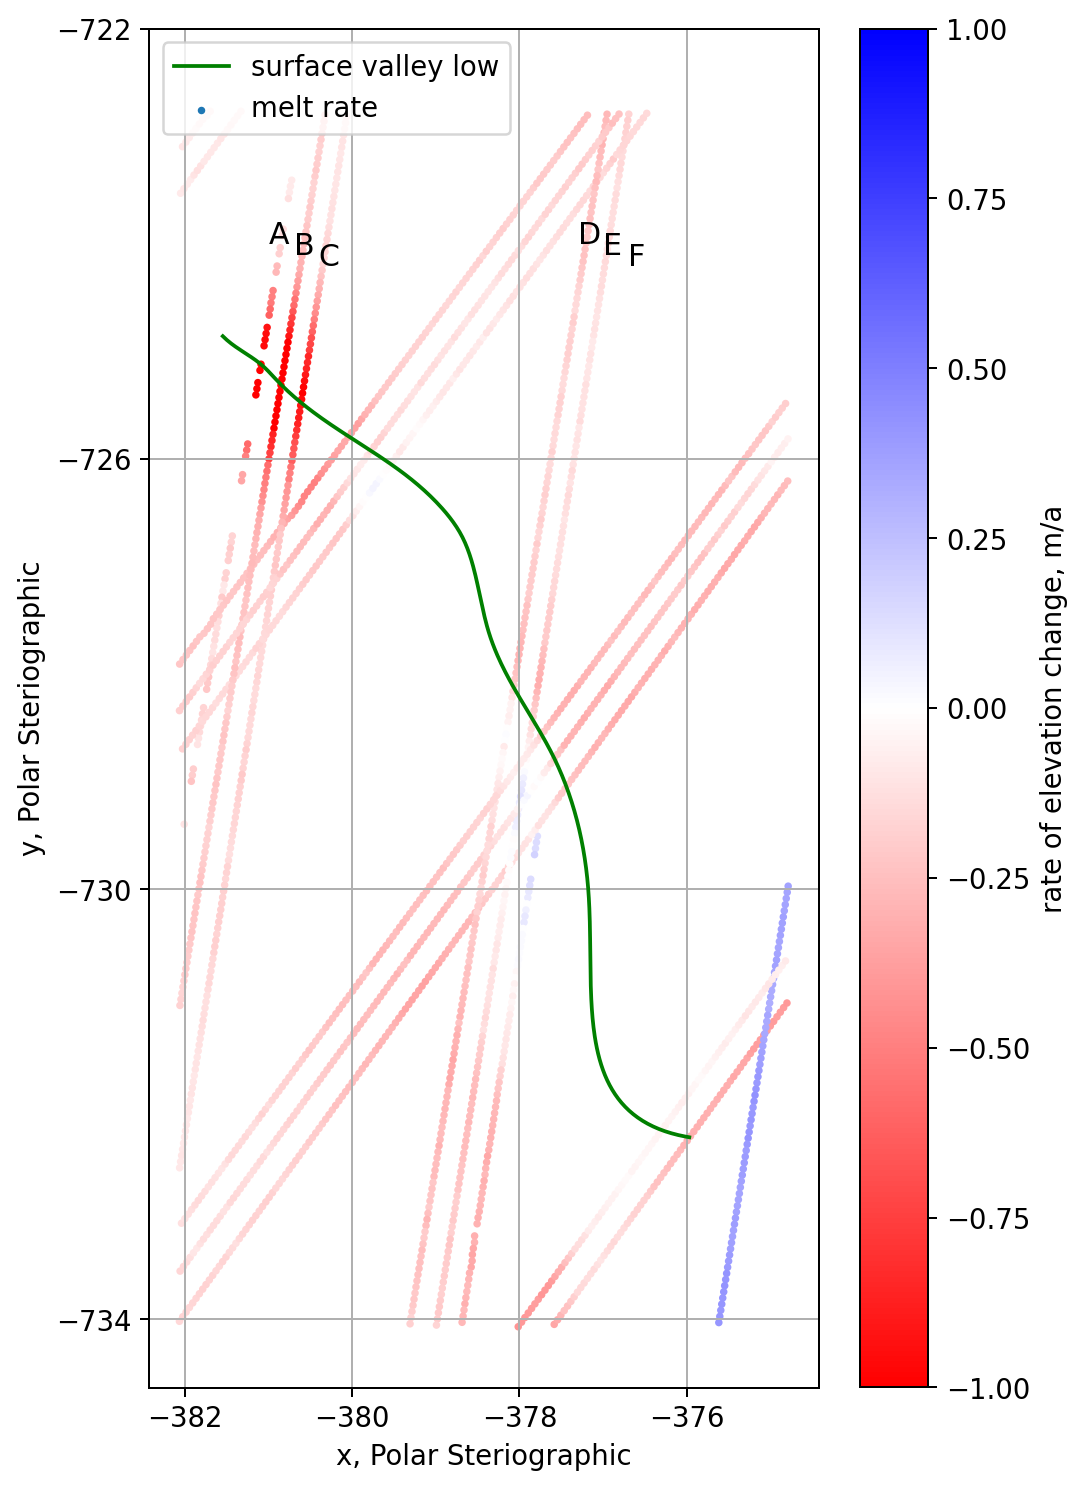

<Figure size 432x288 with 0 Axes>

In [27]:
plt.figure(figsize=[6,10],dpi=180)

font = {'size'   : 11}
mpl.rc('font', **font)

plt.scatter(ds.dadh.x/1000,ds.dadh.y/1000,c=ds.dadh.dhdt, vmin=-1,vmax=1,cmap='bwr_r',s=4)
plt.plot(ds.channel_mid.geometry.x/1000,ds.channel_mid.geometry.y/1000,'g-')
i=65
for x,y in letters_placement:
    plt.text(x,y,chr(i),size=12)
    i += 1
plt.legend(['surface valley low','melt rate'])
cb = plt.colorbar()
cb.set_label('rate of elevation change, m/a')
plt.xlabel('x, Polar Steriographic')
plt.ylabel('y, Polar Steriographic')
plt.xticks(xticks)
plt.yticks(yticks)
plt.grid()
plt.show()

plt.savefig('/Users/home/whitefar/ASSIGNMENTS-PUBLICATIONS-TALKS/channel_data_writeup/PLOTS/icesat2_a.png')

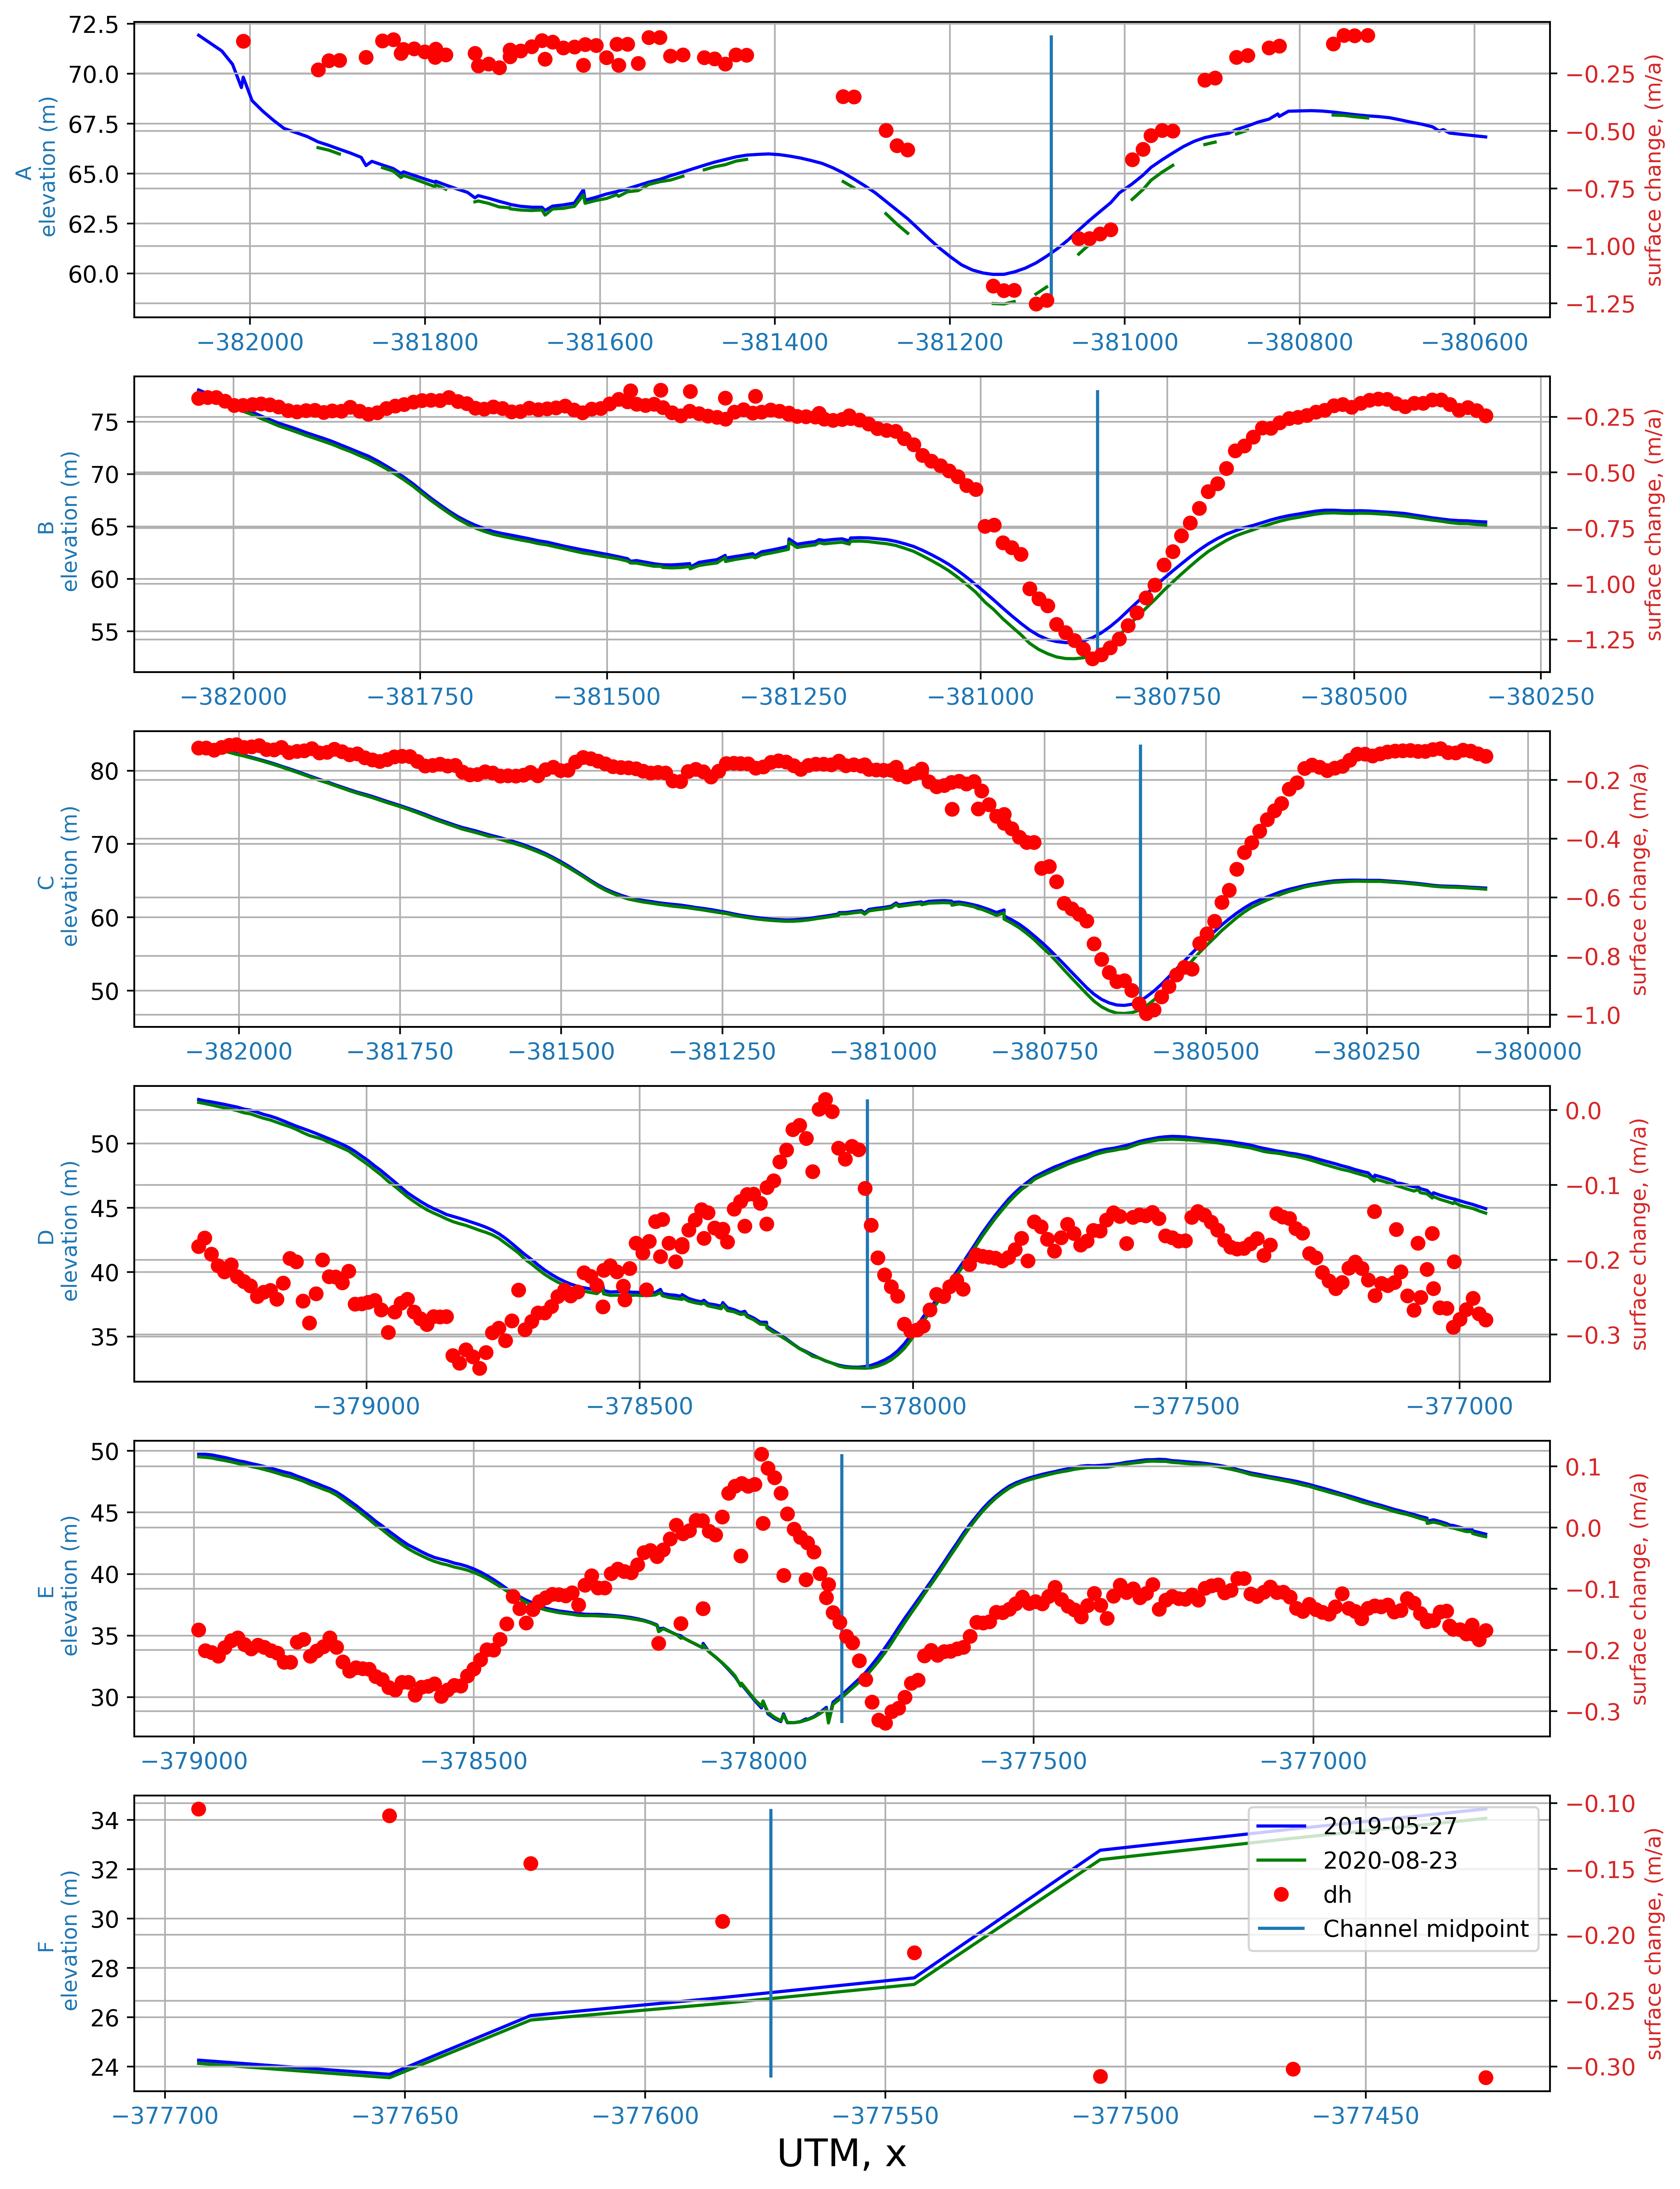

In [28]:
ds.plot_multiple_dhdt_crosssection(cycle_number_from=3,cycle_number_till=8,                                    
                                   icesat_lines = [[14,'up'],[13,'down'],[12,'up'],[8,'up'],
                                                       [7,'down'],[6,'up']])

# icesat2_b
## NOW modify this plot fit for the paper

In [30]:
cycle_number_from=3
cycle_number_till=8
icesat_lines = [[14,'up'],[13,'down'],[12,'up'],[8,'up'],[7,'down'],[6,'up']]

In [31]:
 # if data over that line hasnt been found using getdataline or all_lines, find it.
dict_entrys = [f'is{icesat_line_number[0]}' for icesat_line_number in icesat_lines]
icesat_line_numbers = [b[0] for b in icesat_lines]

gda_line_diffs = []
point_midchannels = []

# for each line do the cross section diff
for icesat_line_number in icesat_line_numbers:
    # if data over that line hasnt been found using getdataline or all_lines, find it.
    dict_entry = f'is{icesat_line_number}'
    try:
        gda_line = ds.gda_lines[dict_entry]
    except KeyError:
        ds.getdata_line(icesat_line_number)
        gda_line = ds.gda_lines[dict_entry]

    for cycle in [cycle_number_from,cycle_number_till]:
        try:
            gda_line.dropna(axis='index',subset=['h_corr']).cycle_number.value_counts().loc[cycle]
        except KeyError:
            print(f'There is no data for line {icesat_line_number}, cycle {cycle}')
            continue

    point_midchannel = np.array( LineString(gda_line.geometry.tolist()).intersection(LineString(ds.channel_mid.geometry.tolist())) ) 

    point_midchannels.append( np.mean(point_midchannel,axis=0) )

   # This dataframe has h_corr from cycle_number_from, and dhdt. Times are from cycle_number_from
    gda_line_diff = gpd.GeoDataFrame( gda_line[gda_line.cycle_number==cycle_number_from],geometry=gda_line.geometry ).reset_index(drop=True)
    gda_line_diff.rename(columns={"h_corr": f"h_corr_cycle_{cycle_number_from}"}, inplace=True)
    gda_line_diff[f"h_corr_cycle_{cycle_number_till}"] = gda_line[gda_line.cycle_number==cycle_number_till].h_corr.reset_index(drop=True)


    gda_line_diff['dh'] =- (gda_line[gda_line.cycle_number==cycle_number_from].h_corr.to_numpy() -
                          gda_line[gda_line.cycle_number==cycle_number_till].h_corr.to_numpy())

    # get the time in years between data points
    gda_line_diff['dt'] = (gda_line[gda_line.cycle_number==cycle_number_till].utc_time.to_numpy()  - 
                      gda_line[gda_line.cycle_number==cycle_number_from].utc_time.to_numpy()  ) 
    gda_line_diff.dt = gda_line_diff.dt /  np.timedelta64(1, 'Y')

    gda_line_diff['dhdt'] = gda_line_diff['dh'].to_numpy()/gda_line_diff['dt'].to_numpy()

    gda_line_diffs.append(gda_line_diff)

    del gda_line_diff

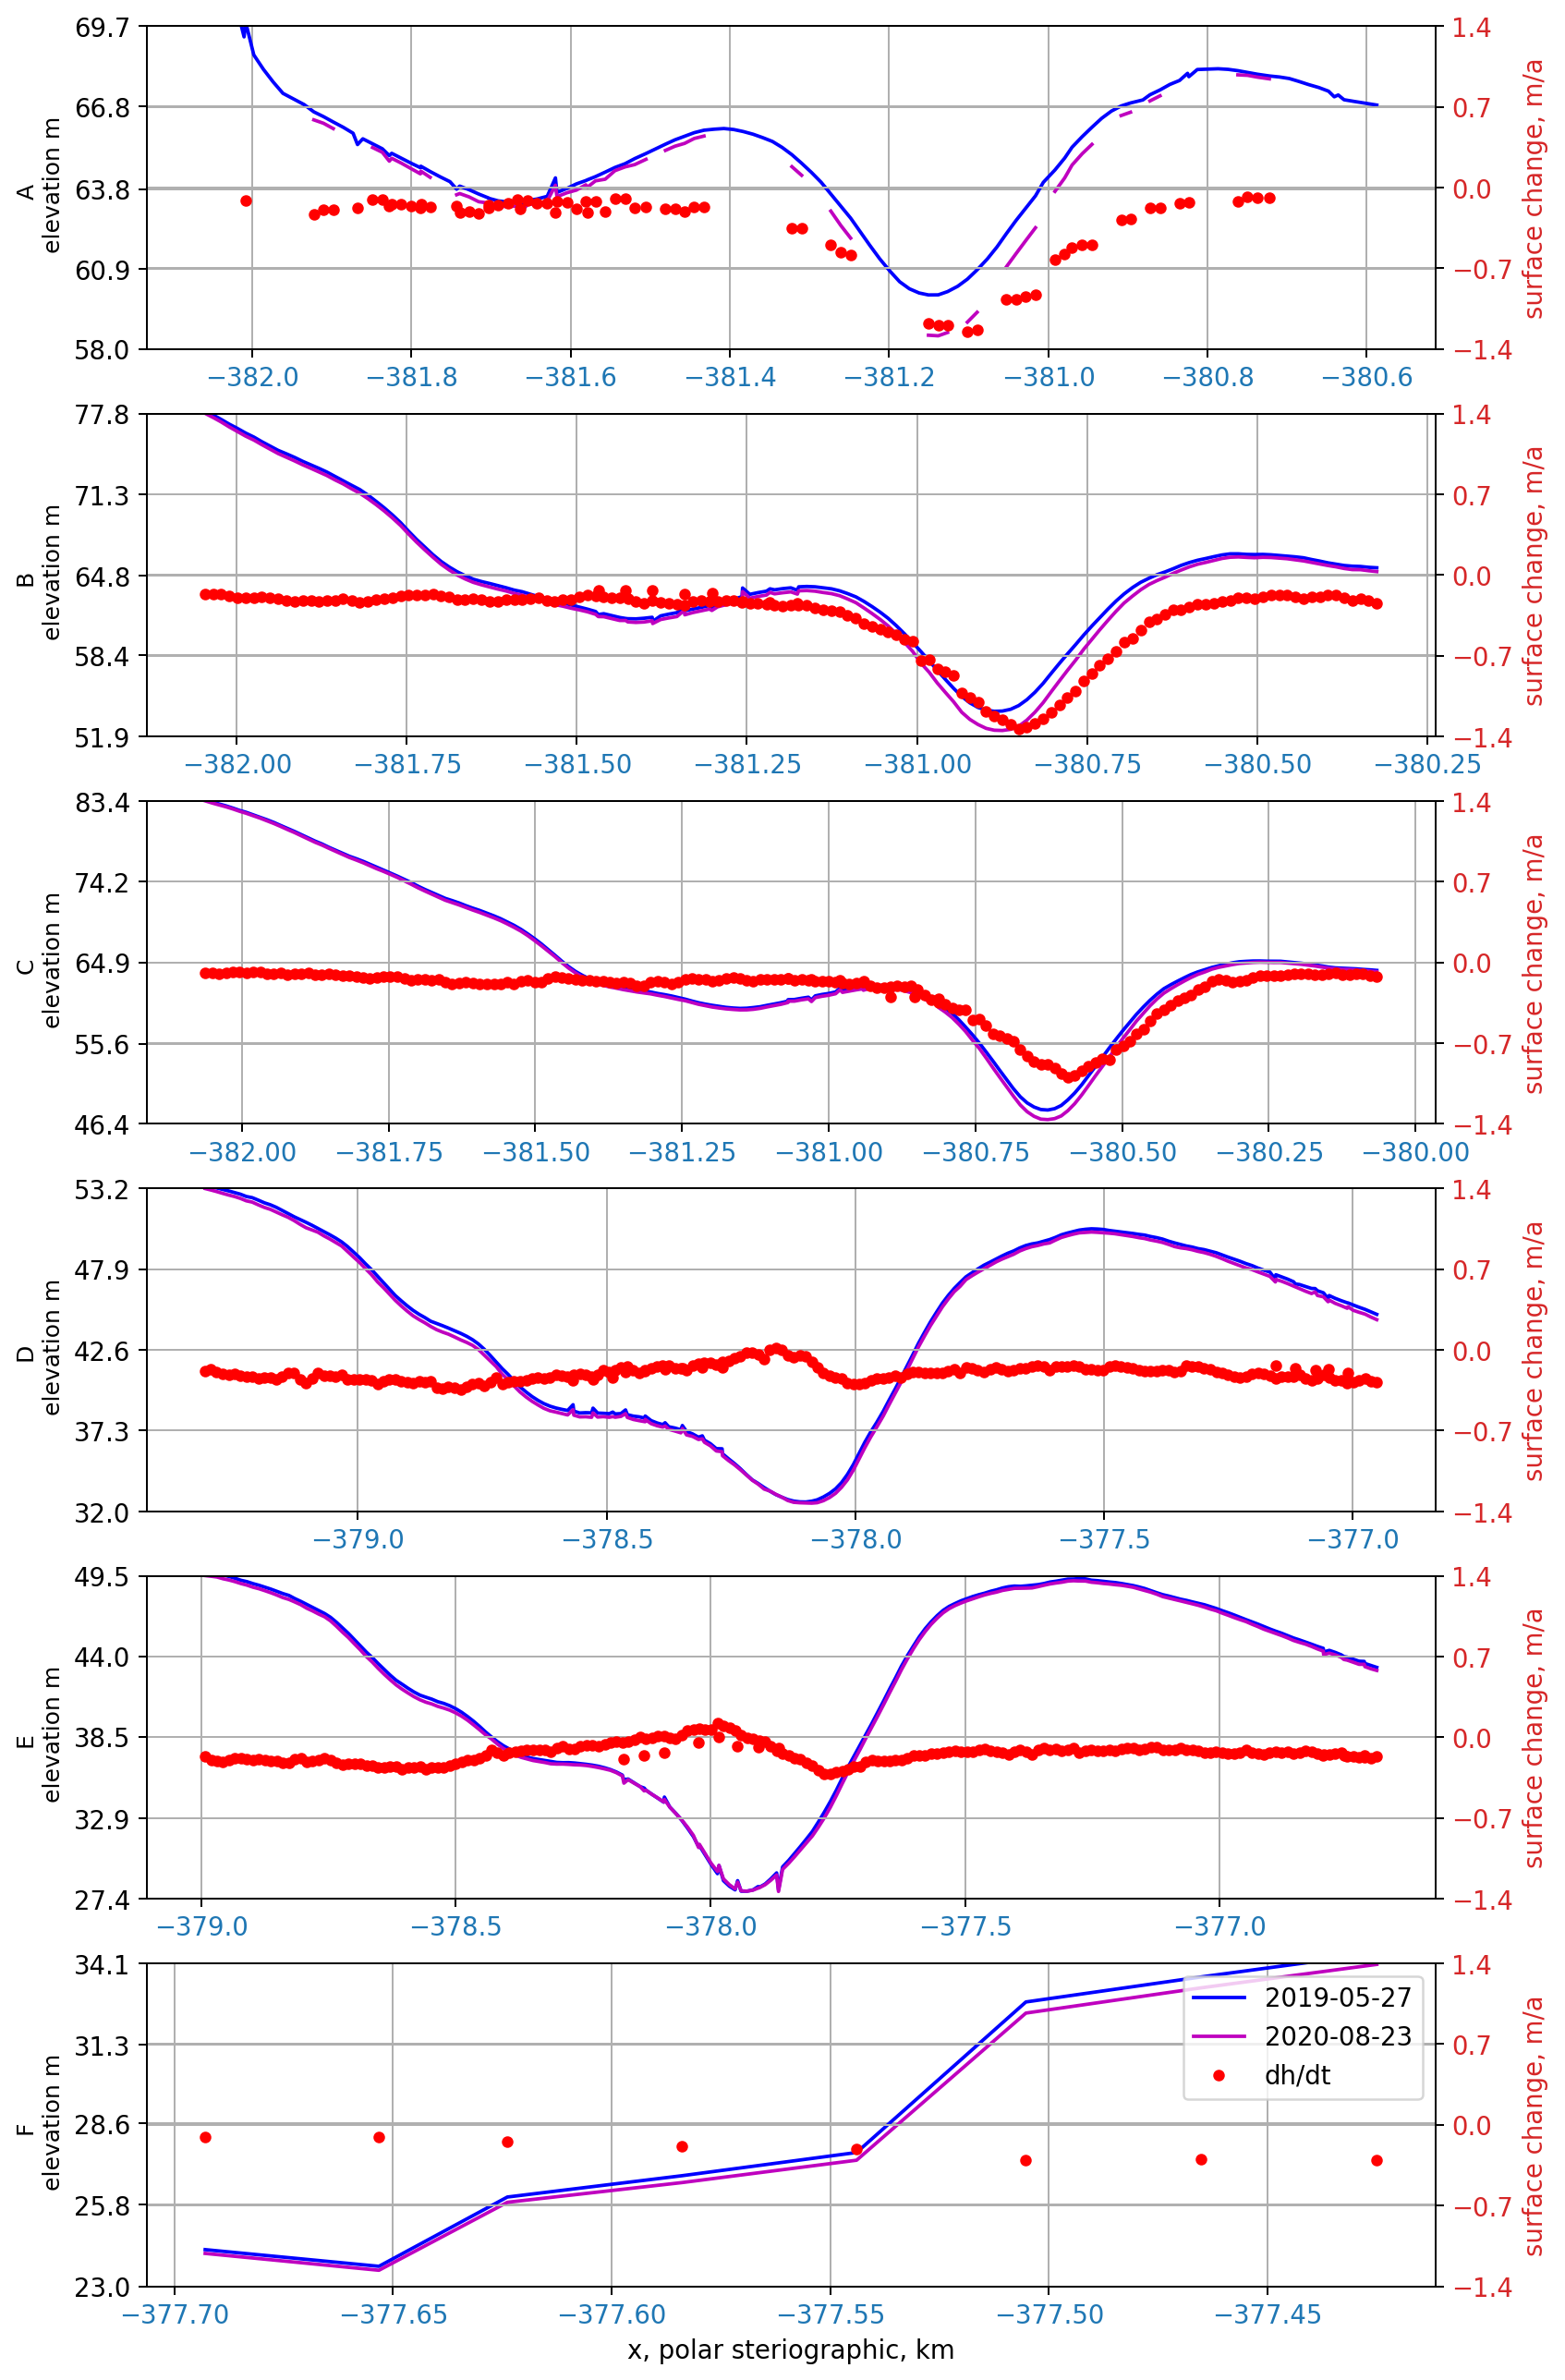

In [68]:
n_plots = 6

fig, ax = plt.subplots(n_plots,1,figsize=(10,3*n_plots),dpi=180)

font = {'size'   : 11}
mpl.rc('font', **font)

i= 65
for ax1,gda_line_diff,point_midchannel in zip(ax,gda_line_diffs,point_midchannels):

    color = 'tab:blue'

    ax1.set_ylabel(f'{chr(i)} \n elevation m', color='k',fontsize=10)
    i += 1

    ax1.plot(gda_line_diff.sort_values(by ='x' ).x/1000,
             gda_line_diff.sort_values(by ='x' )[f"h_corr_cycle_{cycle_number_from}"],'b-',
            label = f"{gda_line[gda_line.cycle_number==cycle_number_from].utc_time.mean().date()}")

    ax1.plot(gda_line_diff.sort_values(by ='x' ).x/1000,
             gda_line_diff.sort_values(by ='x' )[f"h_corr_cycle_{cycle_number_till}"],'m-',
            label = f"{gda_line[gda_line.cycle_number==cycle_number_till].utc_time.mean().date()}")

    ax1.tick_params(axis='x', labelcolor=color)
#     ax1.set_xticks(yticks)
    mn = np.min(gda_line_diff.sort_values(by ='x' )[f"h_corr_cycle_{cycle_number_till}"])
    mx = np.max(gda_line_diff.sort_values(by ='x' )[f"h_corr_cycle_{cycle_number_till}"])
    yyticks = np.linspace(mn-0.5,mx,5).round(1)
    ax1.set_yticks(yyticks)
    ax1.set_ylim([yyticks[0],yyticks[-1]])


    ax1.grid()
#     ax1.legend()

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:red'
     # we already handled the x-label with ax1
    ax2.plot(gda_line_diff.x/1000,gda_line_diff.dhdt,'ro', label='dh/dt',markersize=4)
#     ax2.vlines(point_midchannel[0]/1000,gda_line_diff.dhdt.min(),gda_line_diff.dhdt.max(),color='green',label='surface valley low')

    ax2.tick_params(axis='y', labelcolor=color)
    ax2.grid()
    ax2.set_ylabel('surface change, m/a', color=color)
    ytticks = np.linspace(-1.4,1.4,5)
    ax2.set_ylim([ytticks[0],ytticks[1]])
    ax2.set_yticks(ytticks)
    
    

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc=0)


ax1.set_xlabel('x, polar steriographic, km')

plt.savefig('/Users/home/whitefar/ASSIGNMENTS-PUBLICATIONS-TALKS/channel_data_writeup/PLOTS/icesat2_b.png')
plt.show()

In [58]:
yyticks

array([23.7, 26.4, 29.1, 31.8, 34.4])